Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [29]:
NAME = "Uzma Ahmad"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.
      
**The stock data for month-end close prices shows autocorrelation, with the ACF starting at 1.0 and gradually declining. Significant autocorrelation at lower lags indicates that past values influence future prices. Fluctuations in the ACF suggest periods of both positive and negative correlation, reflecting cyclical behavior or trends in stock prices.**
      
5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.
      
**The monthly returns are not autocorrelated, meaning past performance does not predict future performance. This aligns with the efficient market hypothesis (EMH), which suggests that stock prices follow a random walk and past returns cannot reliably predict future returns.**

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**No significant correlation is observed between the stock returns of AMZN, IBM, META, and MMM, as the scatter plots in the matrix appear widely spread without a clear pattern, suggesting weak or no strong correlation between most stock pairs. This lack of correlation is beneficial for diversification in portfolio management, as it reduces overall risk by spreading investments across assets that do not exhibit similar price movements.**

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 2 - Using Yahoo Finance `yfinance` library

In [35]:
## TYPE YOUE CODE BELOW

In [36]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import autocorrelation_plot, scatter_matrix

# Define start and end dates
end = datetime.datetime.today()
start = end - pd.DateOffset(months=60)

# Download stock data
tickers = ["META", "MMM", "IBM", "AMZN"]
data = yf.download(tickers, start=start, end=end, auto_adjust = False)

data

[*********************100%***********************]  4 of 4 completed


Price        Adj Close                                           Close  \
Ticker            AMZN         IBM        META         MMM        AMZN   
Date                                                                     
2020-03-25   94.292000   80.495956  155.477234   90.225807   94.292000   
2020-03-26   97.774498   85.849686  162.573776   93.408478   97.774498   
2020-03-27   95.004997   82.153786  156.054504   91.391884   95.004997   
2020-03-30   98.197502   85.880096  165.171539   94.478508   98.197502   
2020-03-31   97.486000   84.359161  166.017548   93.634842   97.486000   
...                ...         ...         ...         ...         ...   
2025-03-19  195.539993  252.289993  584.059998  153.210007  195.539993   
2025-03-20  194.949997  243.320007  586.000000  151.270004  194.949997   
2025-03-21  196.210007  243.869995  596.250000  150.360001  196.210007   
2025-03-24  203.259995  248.449997  618.849976  153.149994  203.259995   
2025-03-25  204.940002  249.309998  627.059998  153.865005  204.940002   

Price                                                 High              ...  \
Ticker             IBM        META         MMM        AMZN         IBM  ...   
Date                                                                    ...   
2020-03-25  101.195030  156.210007  109.983276   97.513000  107.533463  ...   
2020-03-26  107.925430  163.339996  113.862877   97.824501  108.173996  ...   
2020-03-27  103.279160  156.789993  111.404678   96.989502  106.596558  ...   
2020-03-30  107.963669  165.949997  115.167221   98.681503  108.470360  ...   
2020-03-31  106.051628  166.800003  114.138794   99.651001  108.804970  ...   
...                ...         ...         ...         ...         ...  ...   
2025-03-19  252.289993  584.059998  153.210007  195.970001  253.660004  ...   
2025-03-20  243.320007  586.000000  151.270004  199.320007  246.800003  ...   
2025-03-21  243.869995  596.250000  150.360001  196.990005  245.210007  ...   
2025-03-24  248.449997  618.849976  153.149994  203.639999  248.820007  ...   
2025-03-25  249.309998  627.059998  153.865005  206.210007  250.899994  ...   

Price              Low                    Open                          \
Ticker            META         MMM        AMZN         IBM        META   
Date                                                                     
2020-03-25  153.059998  106.020065   96.034500  100.841301  158.919998   
2020-03-26  157.020004  109.205688   95.099998  102.208412  158.250000   
2020-03-27  154.750000  109.456520   96.542999  103.804970  158.199997   
2020-03-30  158.059998  109.581940   96.141502  103.336517  159.179993   
2020-03-31  164.199997  113.444817   98.217499  107.074570  165.479996   
...                ...         ...         ...         ...         ...   
2025-03-19  574.770020  150.919998  193.380005  248.330002  584.280029   
2025-03-20  579.510010  151.089996  193.070007  244.240005  582.760010   
2025-03-21  580.950012  148.070007  192.899994  241.690002  583.419983   
2025-03-24  612.200012  150.699997  200.000000  247.309998  614.969971   
2025-03-25  621.185303  152.699997  203.595001  248.360001  627.200012   

Price                      Volume                              
Ticker             MMM       AMZN      IBM      META      MMM  
Date                                                           
2020-03-25  111.329430  129582000  9052084  35184300  9260030  
2020-03-26  110.192307  124426000  7482561  26556800  8033532  
2020-03-27  111.061874  107758000  6718458  24879900  5097711  
2020-03-30  110.576920  122522000  5820467  22515200  4627922  
2020-03-31  113.453178  102472000  6635092  23676300  4321985  
...                ...        ...      ...       ...      ...  
2025-03-19  151.190002   39442900  3853600  20537500  2344100  
2025-03-20  151.649994   38921100  7026800  24336500  2579000  
2025-03-21  149.899994   60056900  9580100  25015900  5538500  
2025-03-24  151.699997   41550100  4752400  1572240

In [37]:
# Extract close prices
adj_close = data["Adj Close"]

# Display first few rows
adj_close.head()

Ticker,AMZN,IBM,META,MMM
Date,,,,
2020-03-25,94.292000,80.495956,155.477234,90.225807
2020-03-26,97.774498,85.849686,162.573776,93.408478
2020-03-27,95.004997,82.153786,156.054504,91.391884
2020-03-30,98.197502,85.880096,165.171539,94.478508
2020-03-31,97.486000,84.359161,166.017548,93.634842


In [38]:
# Resample the data to get the last business day of each month
monthly_data = adj_close.resample('BME').last()

# Display the result
monthly_data

Ticker,AMZN,IBM,META,MMM
Date,,,,
2020-03-31,97.486000,84.359161,166.017548,93.634842
2020-04-30,123.699997,95.484856,203.749741,104.204849
2020-05-29,122.118500,96.256775,224.034119,108.369484
2020-06-30,137.940994,93.073906,226.004852,108.057755
2020-07-31,158.233994,94.746269,252.480057,104.233940
...,...,...,...,...
2024-11-29,207.889999,225.904984,573.347046,132.874557
2024-12-31,219.389999,218.375153,584.989563,128.456345
2025-01-31,237.679993,254.007751,688.567383,151.452911


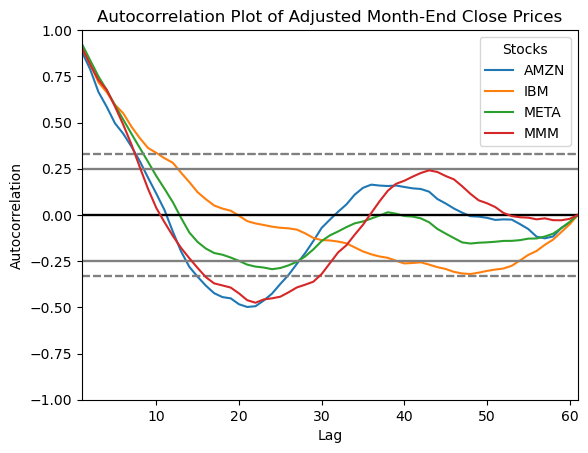

In [39]:
# Loop through each stock column and plot its autocorrelation
for column in monthly_data.columns:  
    autocorrelation_plot(monthly_data[column], label=column)

# Add legend, title, and show the plot
plt.legend(title="Stocks")
plt.title("Autocorrelation Plot of Adjusted Month-End Close Prices")
plt.show()
None

In [40]:
# Calculating and plotting autocorrelation of monthly returns
monthly_returns = monthly_data / monthly_data.shift(1) - 1
monthly_returns

Ticker,AMZN,IBM,META,MMM
Date,,,,
2020-03-31,NaN,NaN,NaN,NaN
2020-04-30,0.268900,0.131885,0.227278,0.112885
2020-05-29,-0.012785,0.008084,0.099555,0.039966
2020-06-30,0.129567,-0.033066,0.008797,-0.002877
2020-07-31,0.147114,0.017968,0.117144,-0.035387
...,...,...,...,...
2024-11-29,0.115290,0.108757,0.011875,0.044914
2024-12-31,0.055318,-0.033332,0.020306,-0.033251
2025-01-31,0.083367,0.163171,0.177059,0.179022


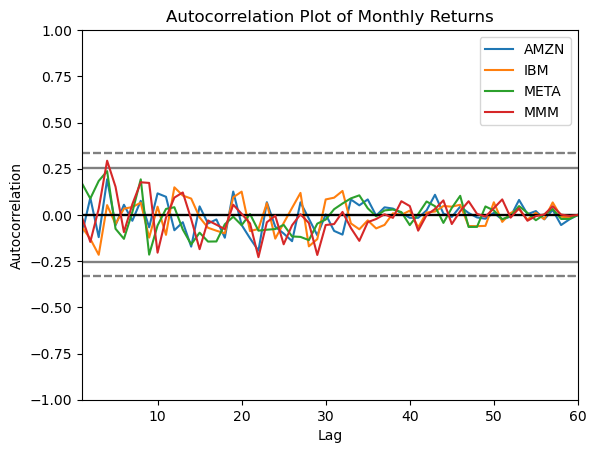

In [41]:
for stock in monthly_returns.columns:
    autocorrelation_plot(monthly_returns[stock].dropna(), label=stock)

plt.title("Autocorrelation Plot of Monthly Returns")
plt.legend()
plt.show()

In [42]:
#Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix 
returns = monthly_data.pct_change().dropna()
returns.head()

Ticker,AMZN,IBM,META,MMM
Date,,,,
2020-04-30,0.268900,0.131885,0.227278,0.112885
2020-05-29,-0.012785,0.008084,0.099555,0.039966
2020-06-30,0.129567,-0.033066,0.008797,-0.002877
2020-07-31,0.147114,0.017968,0.117144,-0.035387
2020-08-31,0.090461,0.016142,0.155832,0.093267


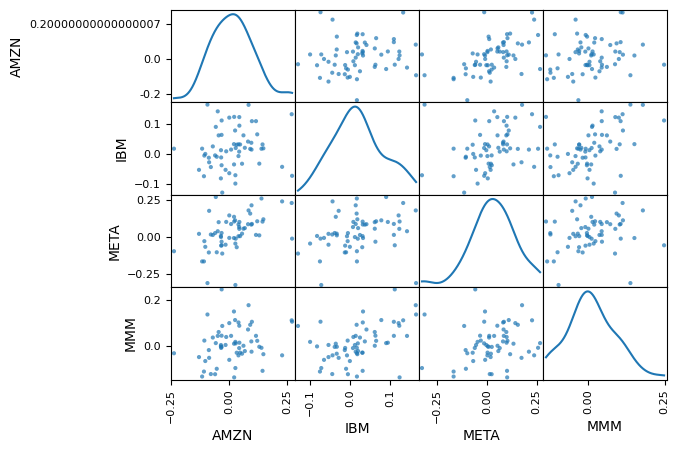

In [43]:
scatter_matrix(returns,diagonal='kde', alpha=0.7)
plt.show()